In [3]:
!pip install yfinance

In [1]:
import matplotlib.pyplot as plt
import sys 
sys.path.append('..')

Matplotlib is building the font cache; this may take a moment.


In [4]:
from data.stock_price_data import HistoricalData

In [5]:
stock_data = HistoricalData()

## Retrieve a Single Stock

In [6]:
stock_data.retrieve_data("MSFT")

[*********************100%***********************]  1 of 1 completed


In [7]:
stock_data.data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-02,249.820007,256.059998,249.690002,255.020004,255.020004,21522800
2022-12-05,252.009995,253.820007,248.059998,250.199997,250.199997,23435300
2022-12-06,250.820007,251.860001,243.779999,245.119995,245.119995,22463700
2022-12-07,244.830002,246.160004,242.210007,244.369995,244.369995,20481500
2022-12-08,244.839996,248.720001,243.070007,247.399994,247.399994,20766992


In [8]:
labels = stock_data.data.columns
labels

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

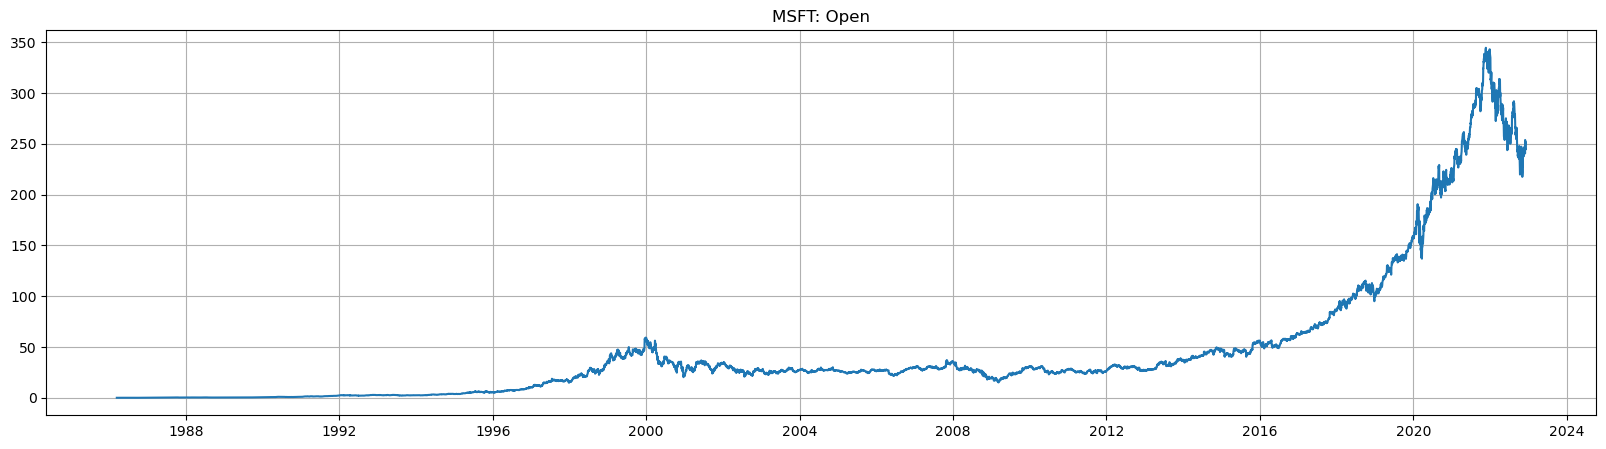

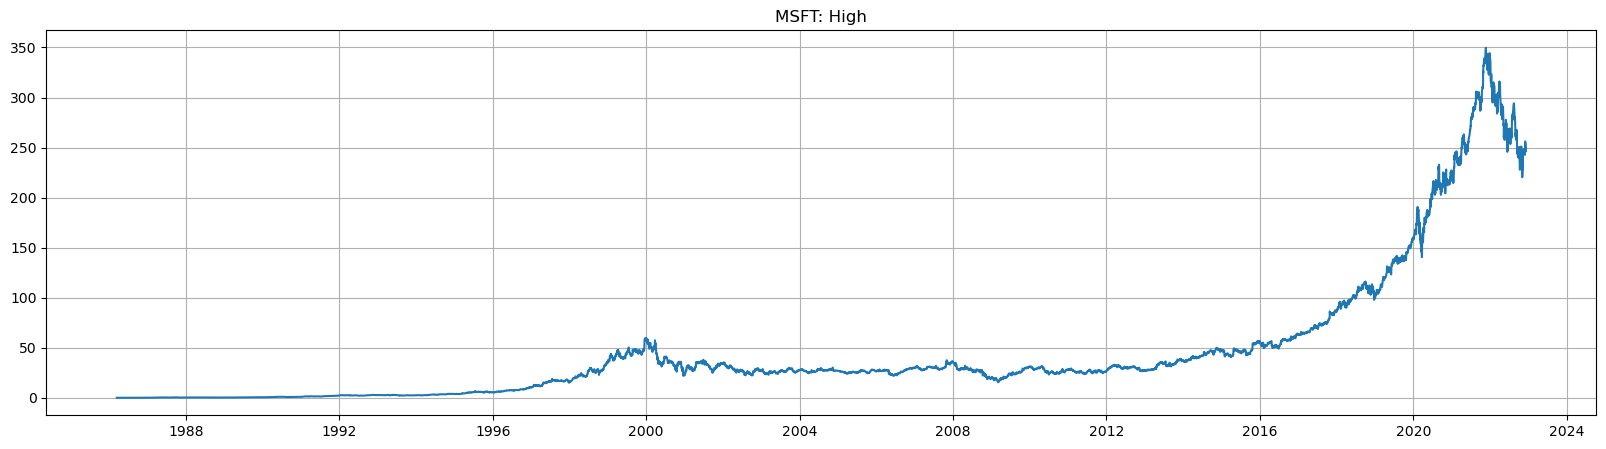

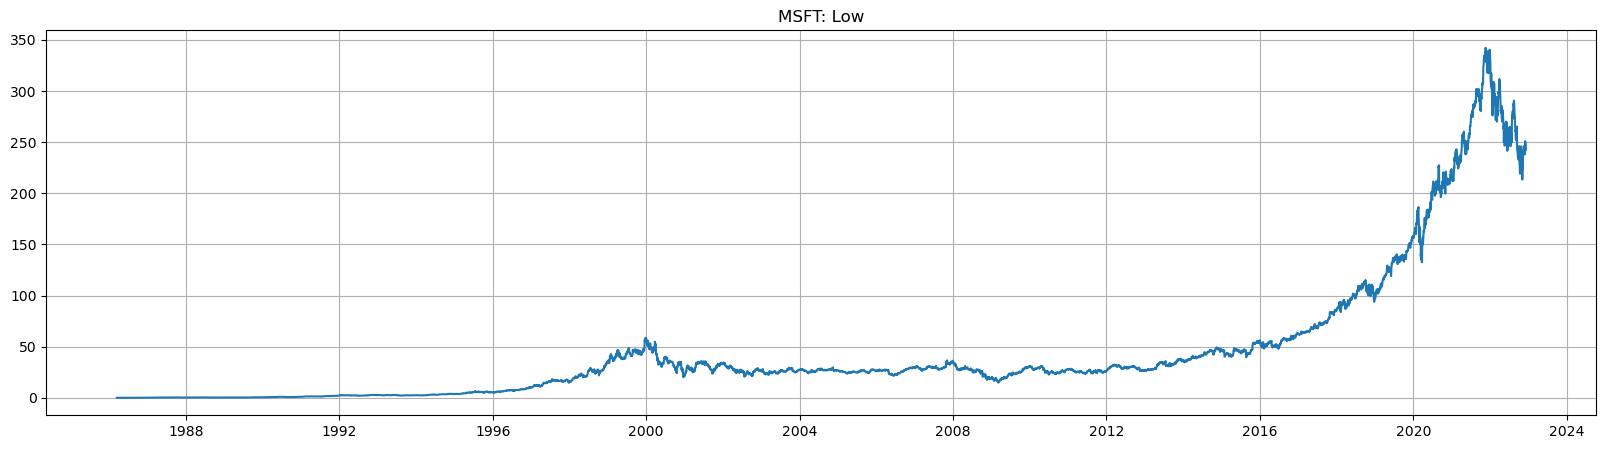

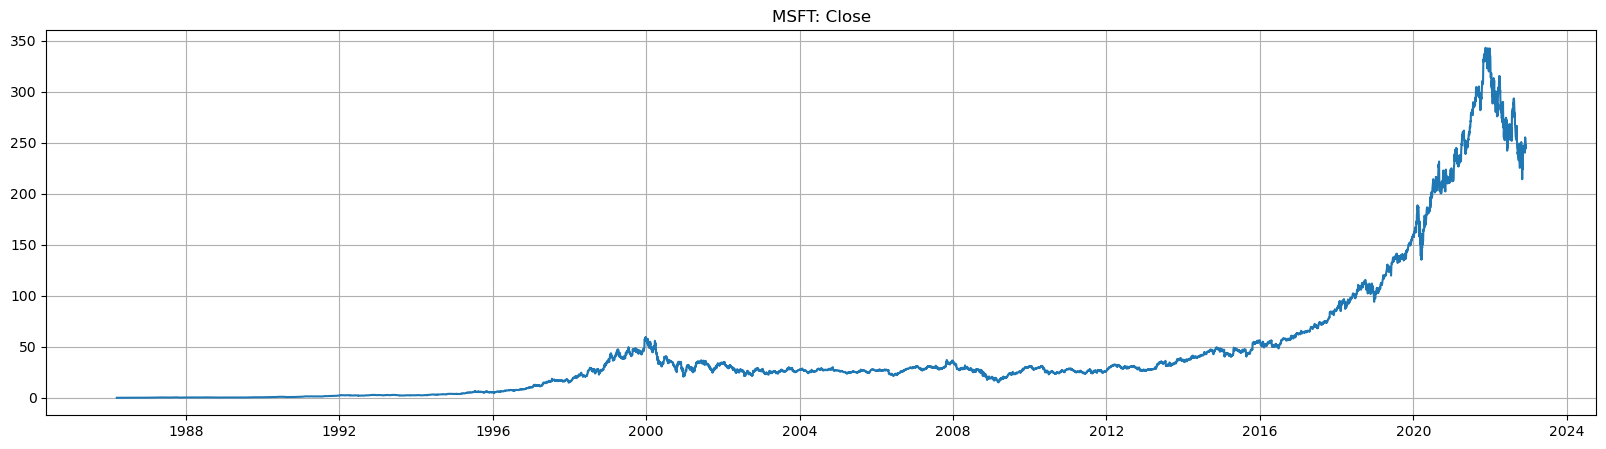

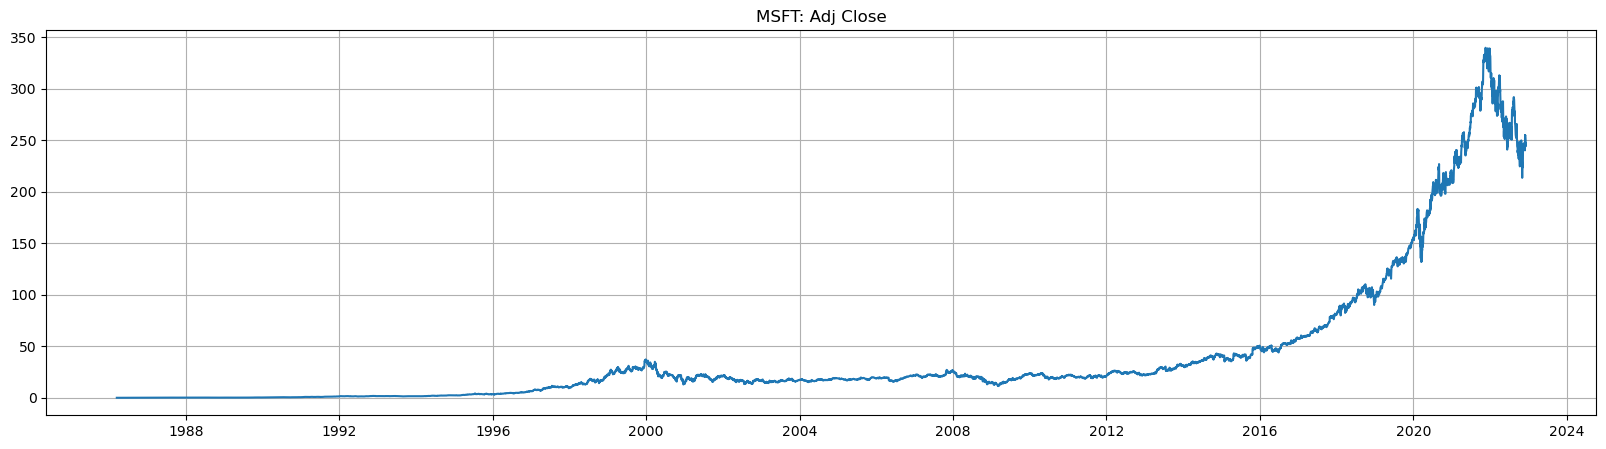

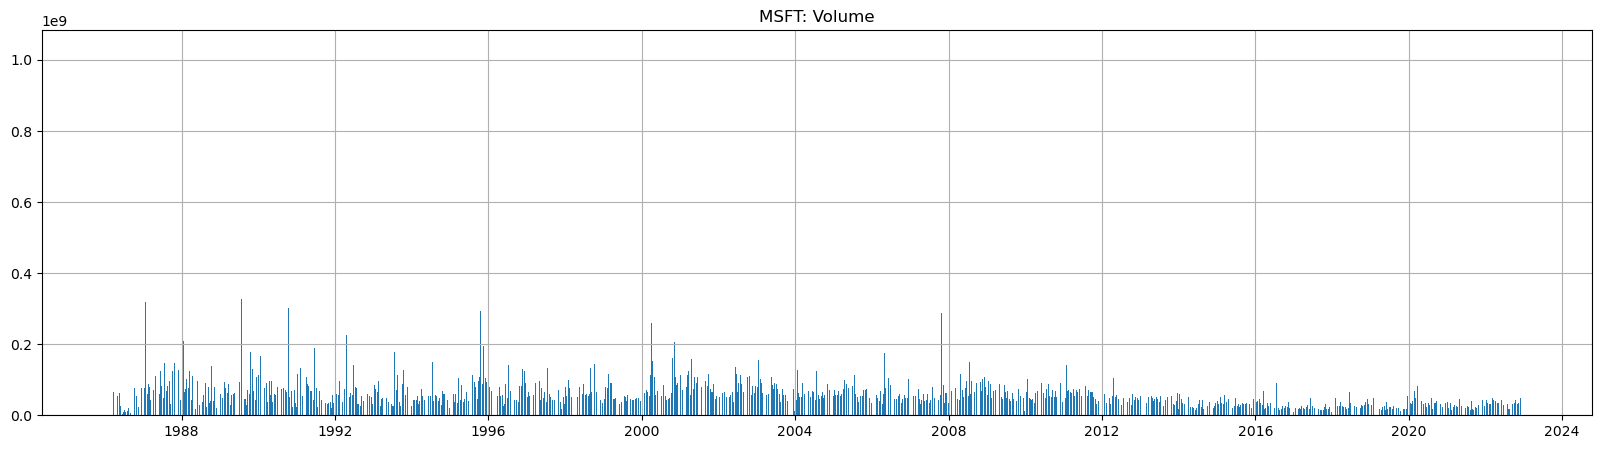

In [9]:
for col in labels:
    plt.figure(figsize=(20,5))
    if col == 'Volume':
        plt.bar(stock_data.data.index, stock_data.data[col])
    else:
        plt.plot(stock_data.data.index, stock_data.data[col])
    plt.title(f'MSFT: {col}')
    plt.grid()
    plt.show()



## Retrieve multiple stocks

In [10]:
stock_data.retrieve_data("MSFT", "TSLA", "AAPL")

[*********************100%***********************]  3 of 3 completed


In [11]:
stock_data.data.columns

MultiIndex([('TSLA',      'Open'),
            ('TSLA',      'High'),
            ('TSLA',       'Low'),
            ('TSLA',     'Close'),
            ('TSLA', 'Adj Close'),
            ('TSLA',    'Volume'),
            ('MSFT',      'Open'),
            ('MSFT',      'High'),
            ('MSFT',       'Low'),
            ('MSFT',     'Close'),
            ('MSFT', 'Adj Close'),
            ('MSFT',    'Volume'),
            ('AAPL',      'Open'),
            ('AAPL',      'High'),
            ('AAPL',       'Low'),
            ('AAPL',     'Close'),
            ('AAPL', 'Adj Close'),
            ('AAPL',    'Volume')],
           )

In [12]:
stock_data.data['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600
...,...,...,...,...,...,...
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200


In [13]:
# only getting the closing prices of the stocks.
idx = [x for x in stock_data.data.columns if 'Close' in x]

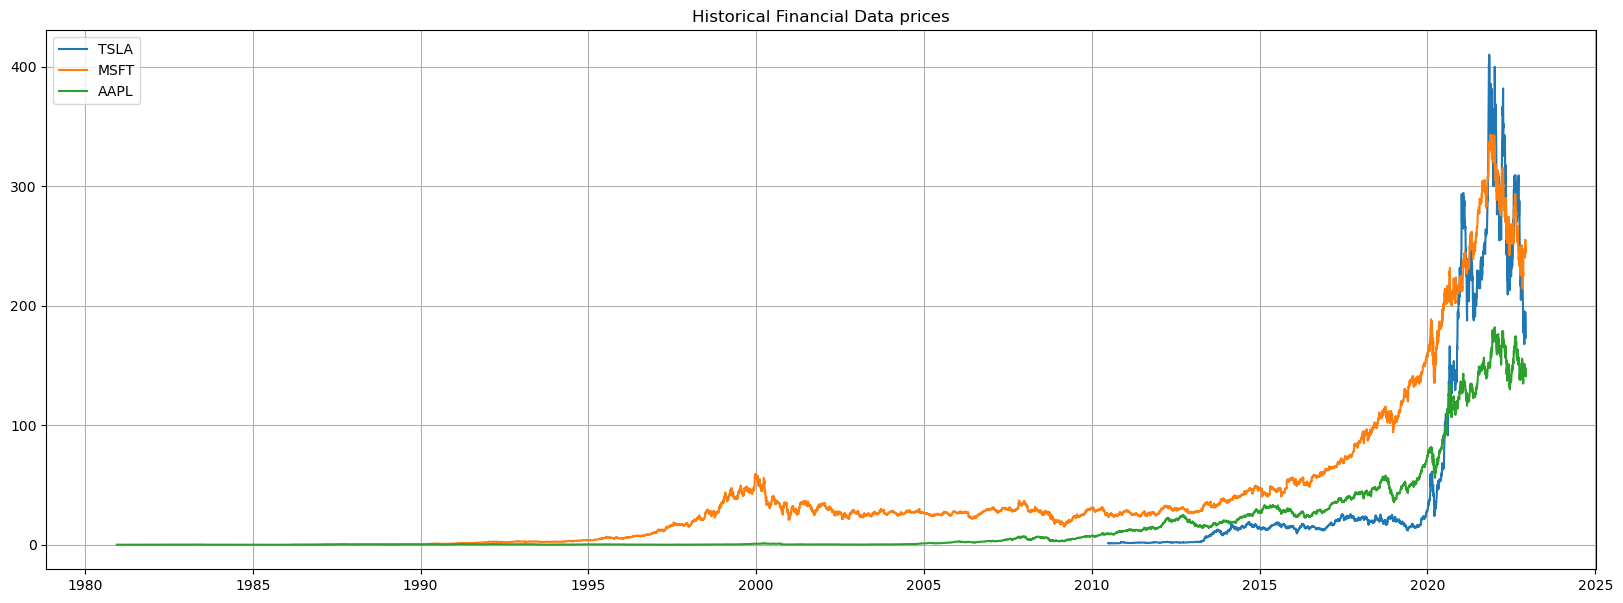

In [14]:
plt.figure(figsize=(20,7))
for col in idx:
    data = stock_data.data[col]
    plt.plot(data.index, data.values, label=col[0])
    
plt.title('Historical Financial Data prices')
plt.grid()
plt.legend()
plt.show()

In [15]:
# Getting the traded volume of stocks.
idx = [x for x in stock_data.data.columns if 'Volume' in x]

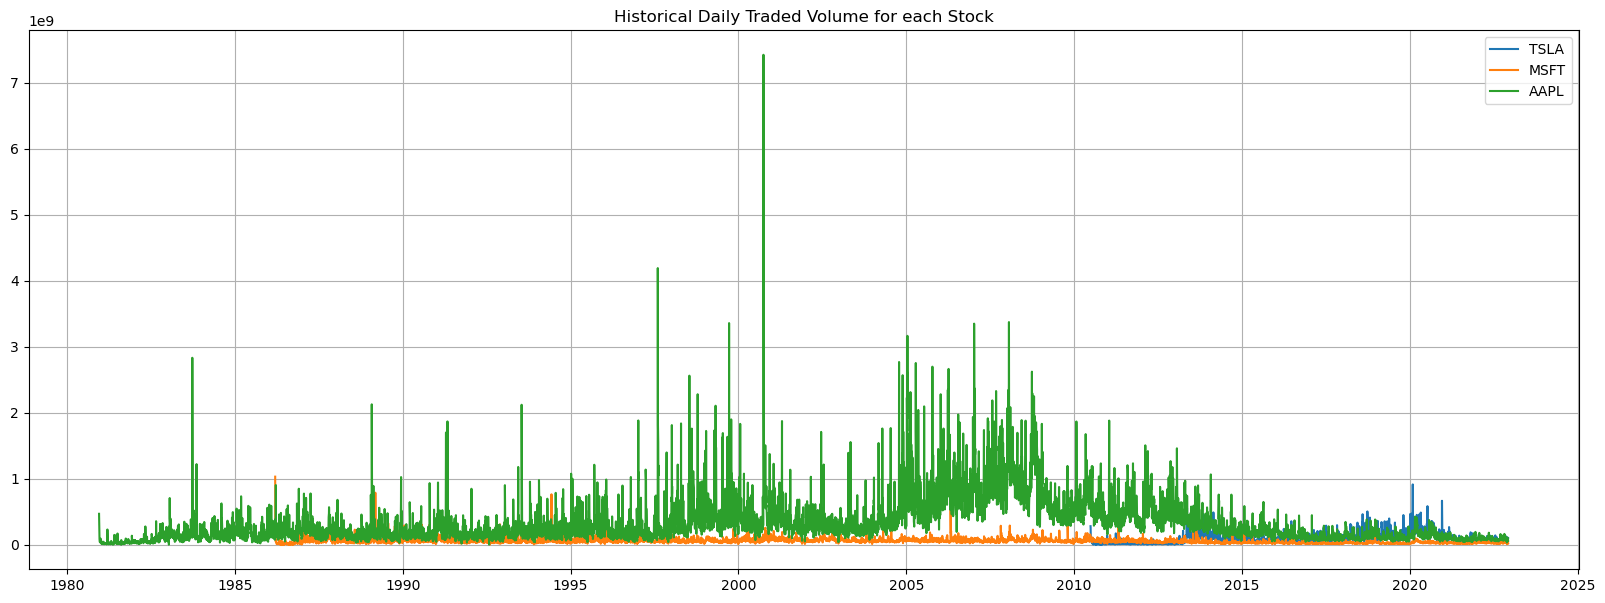

In [16]:
# Plotting the Traded Volume of Stock for each 
plt.figure(figsize=(20,7))
for col in idx:
    data = stock_data.data[col]
    plt.plot(data.index, data.values, label=col[0])
    
plt.title('Historical Daily Traded Volume for each Stock')
plt.grid()
plt.legend()
plt.show()

#### AAPL is obviously the most traded stock, justifying also its position has the most capitalised company on the stock market
#### However the trading volume seems to be dropping from 2007/2008 - with TSLA effectively capturing the top spot 
#### More: https://www.investopedia.com/biggest-companies-in-the-world-by-market-cap-5212784